In [1]:
import numpy as np
from gradvi.normal_means import NormalMeans, NormalMeansFromPosterior
from gradvi.models import LinearModel
from gradvi.models import basis_matrix
from gradvi.tests import toy_priors, toy_data

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

In [2]:
priors = toy_priors.get_all()
prior = priors[0]
n = 1000
p = 2000
p_causal = 50
pve = 0.5
X, y, btrue, s2 = toy_data.get_linear_model(n, p, p_causal, pve, rho = 0)
bzero = np.zeros(p)
brand = np.random.rand(p)
bpost = np.random.normal(0, 0.0001, size = p)

In [3]:
from gradvi.inference import LinearRegression
gv = LinearRegression(maxiter = 1000, obj = 'direct', tol = 1e-8)
gv.fit(X, y, prior, b_init = btrue, s2_init = s2)
bpost = gv.coef
s2_post = gv.residual_var
prior_post = gv.prior

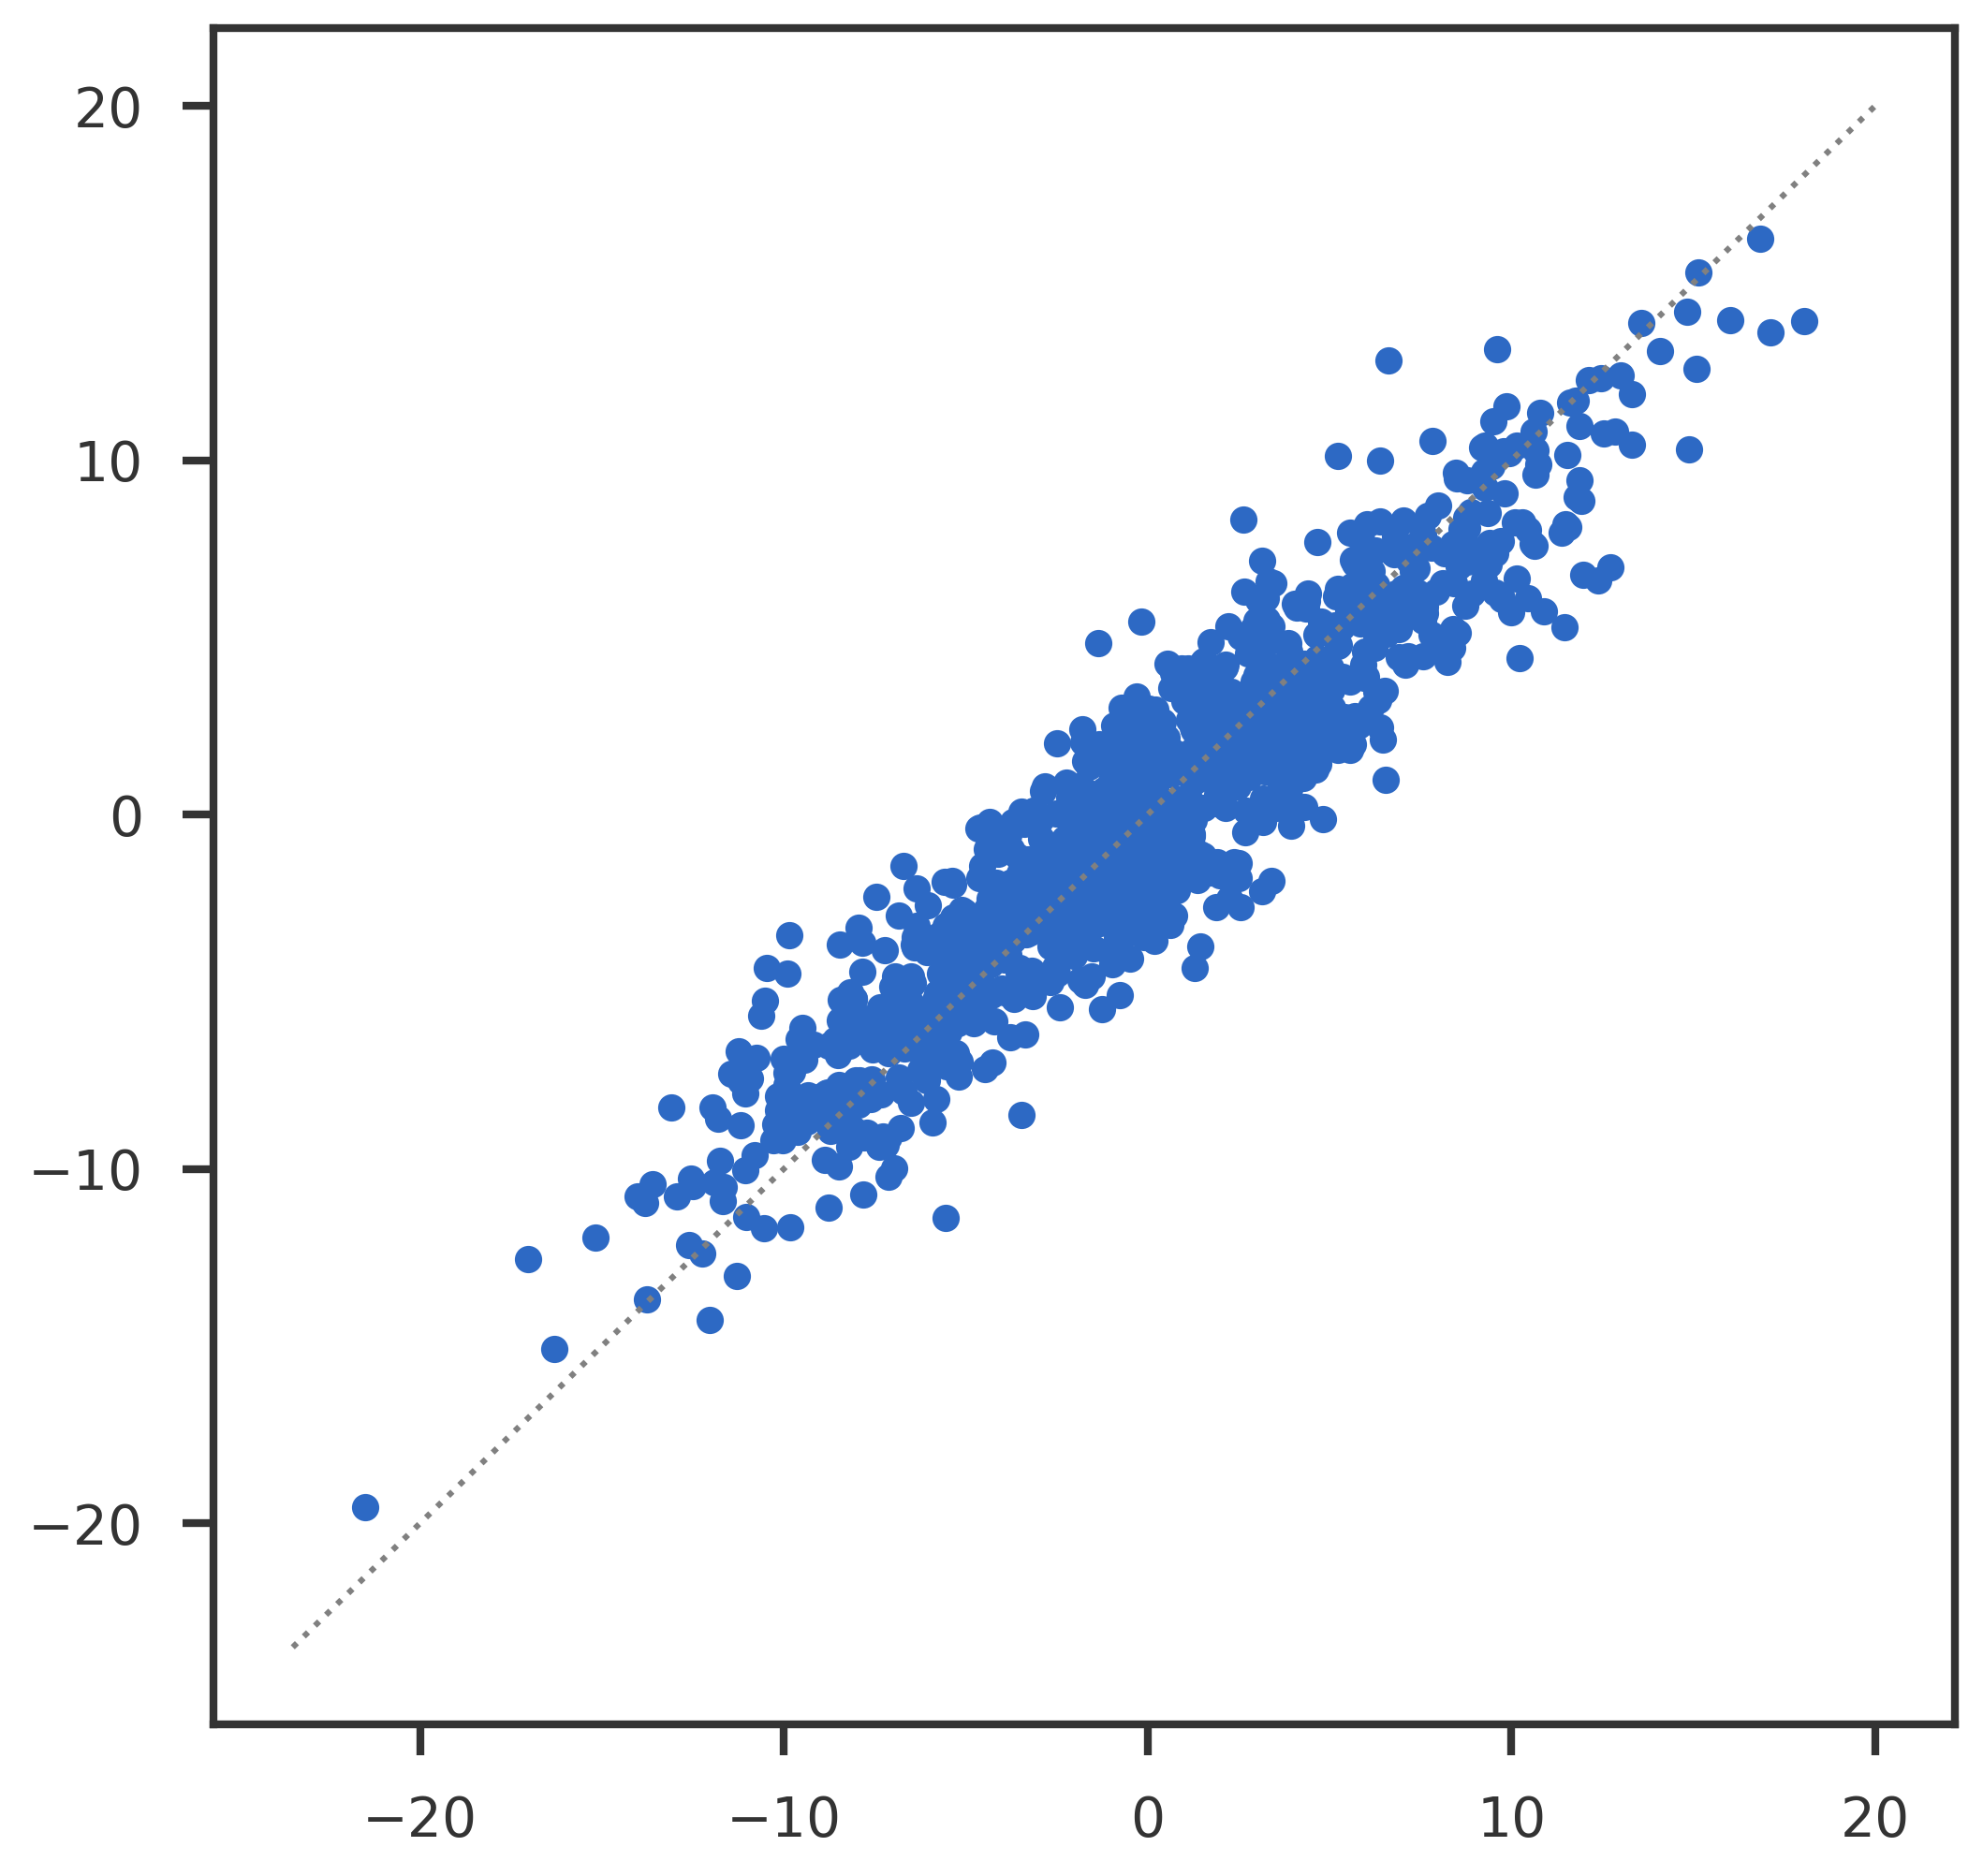

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(np.dot(X, btrue), np.dot(X, bpost))
mpl_utils.plot_diag(ax1)
plt.show()

In [5]:
bdict = {
    'true': btrue,
    'zero': bzero,
    'rand': brand,
    'post': bpost
}

bcolors = {
    'true': "#535154",
    'zero': "#CC2529",
    'rand': "#2D69C4",
    'post': "#93AA00"
}

In [6]:
lmd = dict()
dha = dict()
for k, b in bdict.items():
    lmd[k] = LinearModel(X, y, b, s2_post, prior_post, objtype = 'direct')
    dha[k] = lmd[k].bgrad

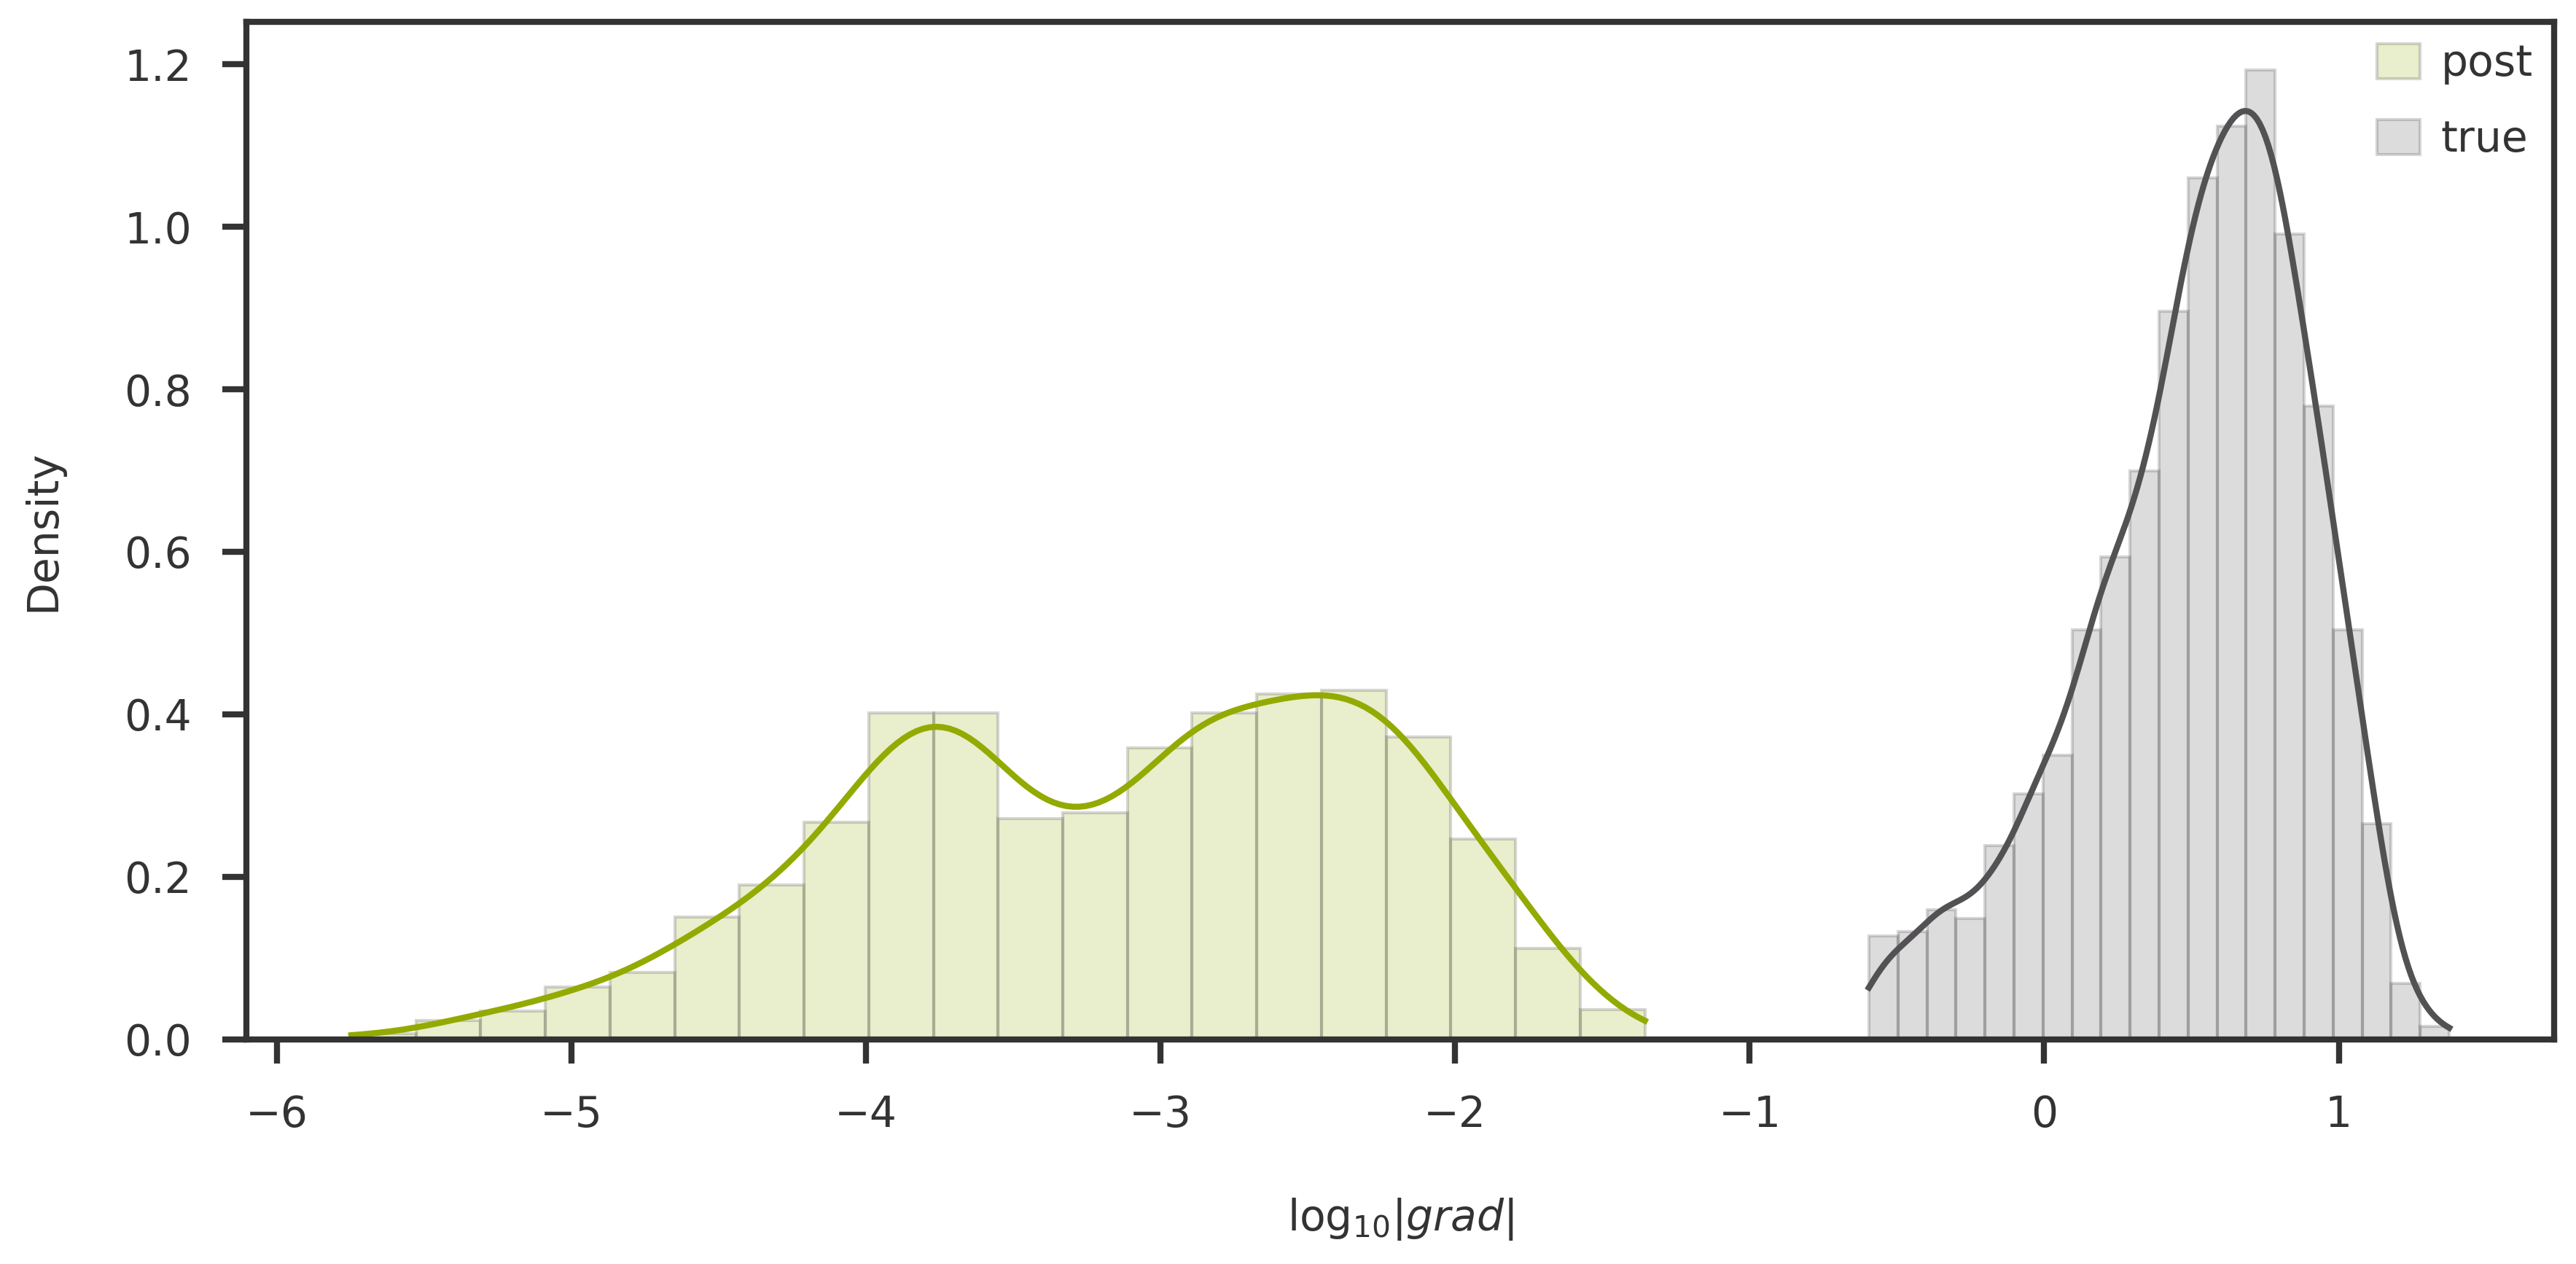

In [7]:
from scipy.stats import gaussian_kde as sp_gaussian_kde

def remove_outliers(data):
    quant3, quant1 = np.percentile(data, [75 ,25])
    iqr = quant3 - quant1
    xmin = quant1 - 1.5 * iqr
    xmax = quant3 + 1.5 * iqr
    Xkeep = np.array([x for x in data if (x >= xmin and x <= xmax)])
    return Xkeep

def density_plot(ax, data, label = '', color = 'k'):
    x = data.copy()
    x = remove_outliers(data)
    xmin = np.min(x)
    xmax = np.max(x)
    kernel = sp_gaussian_kde(x)
    # smoothing
    kernel.covariance_factor = lambda : .2
    kernel._compute_covariance()
    
    xvals  = np.linspace(xmin, xmax, 200)
    density = kernel(xvals)
    ax.hist(x, density = True, label = label, color = color, alpha = 0.2)
    ax.plot(xvals, density, lw = 2, color = color)
    return

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)

#for k in bdict.keys():
for k in ['post', 'true']:
    xvals = np.log10(np.abs(dha[k]))
    density_plot(ax1, xvals, label = k, color = bcolors[k])

ax1.legend()
ax1.set_ylabel("Density")
ax1.set_xlabel(r"$\log_{10}|grad|$")

#ax2.legend()
#mpl_utils.plot_diag(ax2)

fig.tight_layout()
# fig.subplots_adjust(wspace=0.35)
# utils.saveplot(fig, 'trendfiltering_simple_examples_wavelet_moving_average_init_properties')
plt.show()

In [8]:
dir(gv.logger)

['gradvi',
 'gradvi.inference.linear_regression',
 'gradvi.models.linear_model',
 'gradvi.normal_means.nm_ash',
 'gradvi.normal_means.normal_means_from_posterior',
 'gradvi.optimize.root_find',
 'gradvi.tests.test_linear_model',
 'gradvi.tests.test_linear_regression',
 'gradvi.tests.test_nm_from_posterior',
 'gradvi.tests.test_nm_operator',
 'gradvi.tests.test_normal_means',
 'gradvi.tests.test_old_plr_ash',
 'gradvi.tests.test_root_find']